# Importing Libraries

In [1]:
import numpy as np
np.random.seed(1337) # for reproducibility


In [2]:
import pdb

import scipy.io as sio
import keras
from keras.layers import Input, Dense, Lambda, Layer, Activation,Dropout,GaussianNoise
from keras.models import Model, Sequential,load_model
from keras import backend as K
from keras import optimizers, metrics
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.initializers import glorot_uniform
from matplotlib import pyplot
#from keras.utils.vis_utils import plot_model

# Defining activation function

# Defining loss function

In [3]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))



#Loading data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cell=1
 # Load input
mat_contents = sio.loadmat('/content/drive/MyDrive/dataset_maxmin.mat')

# row numbers input set size columns number training set size
Input = mat_contents['Input_tr_dB_normalized']
#output
Output = mat_contents['Output_tr_MR_maxmin_dB_normalized_cell_' + str(cell)]

Input_tr = np.transpose(Input)
Output_tr = np.transpose(Output)

print("Size input vector", Input_tr.shape)
print("Size output vector", Output_tr.shape)
# Size of input vector
k = Input.shape
# Number of variable to optimize
N_input = k[0]
# Number of training setups
N_tr = k[1]
print(N_input)

Size input vector (330000, 40)
Size output vector (330000, 5)
40


# Building Model

Model parameter

In [8]:
# Maximum number of epochs
N_max_epoch = 5
# Batch size
N_batch_size = 64
K_initializer = 'random_normal'
B_initializer = 'random_uniform'
K_regularizer = None

Model

40 x 512 + 512 = 20992

512 x 256 + 256 = 131328

256 x 128 + 128 = 32896  

In [11]:
# Neural network configuration
model = Sequential()
model.add(Dense(512, activation='elu', name='layer1', input_shape=(N_input,), kernel_initializer=K_initializer,bias_initializer=B_initializer))
model.add(Dense(256, activation='elu', name='layer2', kernel_initializer=K_initializer, bias_initializer=B_initializer))
model.add(Dense(128, activation='elu', name='layer3', kernel_initializer=K_initializer, bias_initializer=B_initializer))
model.add(Dense(128, activation='elu', name='layer4', kernel_initializer=K_initializer, bias_initializer=B_initializer))
# model.add(Dense(32, activation='elu', name='layer5', kernel_initializer=K_initializer, bias_initializer=B_initializer))
model.add(Dense(5, activation='elu', name='layer5', kernel_initializer=K_initializer, bias_initializer=B_initializer))
model.add(Dense(5, activation='linear', name='layer6', trainable=False))
print(model.summary())
#plot_model(model, to_file='mlp-regression.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               20992     
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 128)               16512     
                                                                 
 layer5 (Dense)              (None, 5)                 645       
                                                                 
 layer6 (Dense)              (None, 5)                 30        
                                                                 
Total params: 202403 (790.64 KB)
Trainable params: 202

In [ ]:
# Optimizer
#adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1)

ValueError: ignored

In [12]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0., patience=2, verbose=0, mode='auto')


In [ ]:
callback = [early_stopping]

model.compile(loss='mse', optimizer='adam', metrics=[rmse])
K.set_value(model.optimizer.lr, 0.001)
history = model.fit(Input_tr, Output_tr, validation_split=0.03125, epochs=N_max_epoch, batch_size=N_batch_size,
                        callbacks=callback)


Epoch 1/5
4996/4996 [==============================] - 28s 5ms/step - loss: 0.6420 - rmse: 0.6420 - val_loss: 0.5793 - val_rmse: 0.5793
Epoch 2/5
4996/4996 [==============================] - 20s 4ms/step - loss: 0.5686 - rmse: 0.5686 - val_loss: 0.5623 - val_rmse: 0.5623
Epoch 3/5
4996/4996 [==============================] - 24s 5ms/step - loss: 0.5534 - rmse: 0.5534 - val_loss: 0.5559 - val_rmse: 0.5559
Epoch 4/5
4996/4996 [==============================] - 22s 4ms/step - loss: 0.5435 - rmse: 0.5435 - val_loss: 0.5434 - val_rmse: 0.5434
Epoch 5/5
4996/4996 [==============================] - 24s 5ms/step - loss: 0.5355 - rmse: 0.5355 - val_loss: 0.5357 - val_rmse: 0.5357


dict_keys(['loss', 'rmse', 'val_loss', 'val_rmse'])


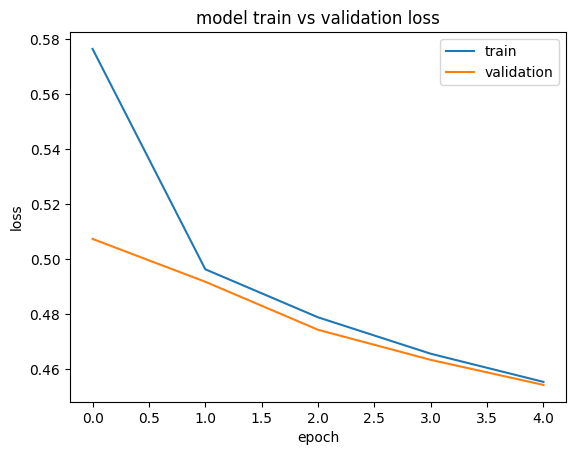

In [ ]:
#plot metrics
print(history.history.keys())
pyplot.figure(1)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


saving the model

In [ ]:
model.save('saved_neural_networks/NN_MMMSE_maxmin_cell_'+ str(cell) +'.h5')

#Testing the model

In [ ]:
mat_contents = sio.loadmat('/content/drive/MyDrive/testset_maxmin.mat')

In [ ]:
Input_test = mat_contents['Input_tr_dB_normalized']

In [ ]:
# Run the neural network
output_NN = model.predict(np.transpose(Input_test))
print(output_NN)
# Save output in a matlab file
sio.savemat('/content/drive/MyDrive/pow_MMMSE_maxmin_cell_'+ str(cell) +'.mat', {'Output_test_' + str(cell): np.transpose(output_NN)})


157/157 [==============================] - 0s 1ms/step
[[ 1.1242789  -0.2757941   0.37867412 -2.411911   -1.9431564 ]
 [ 0.33229792 -0.46580267  0.9252212   0.02441603 -0.15435241]
 [ 0.5899836  -0.36321566  0.43547755 -0.6111093   0.55489707]
 ...
 [ 0.76449126  0.9971045   0.80746925  0.60509986  0.22904173]
 [ 0.7642319   0.9048424   0.01041737  0.24934085  0.14546852]
 [-1.0866871   0.19008973  0.9199614  -0.22382407  0.11178136]]
